In [8]:
import sys
sys.path.insert(0, 'E:\\StuDY\\Keys')
from db_credentials import *
import redshift_connector
from sql_queries import table_list, staging_table_list

In [9]:
conn = redshift_connector.connect(
    host = spotify_redshift_host, 
    database = spotify_redshift_db,
    user = spotify_redshift_user,
    password = spotify_redshift_password

)

In [10]:
cursor = redshift_connector.Cursor = conn.cursor()

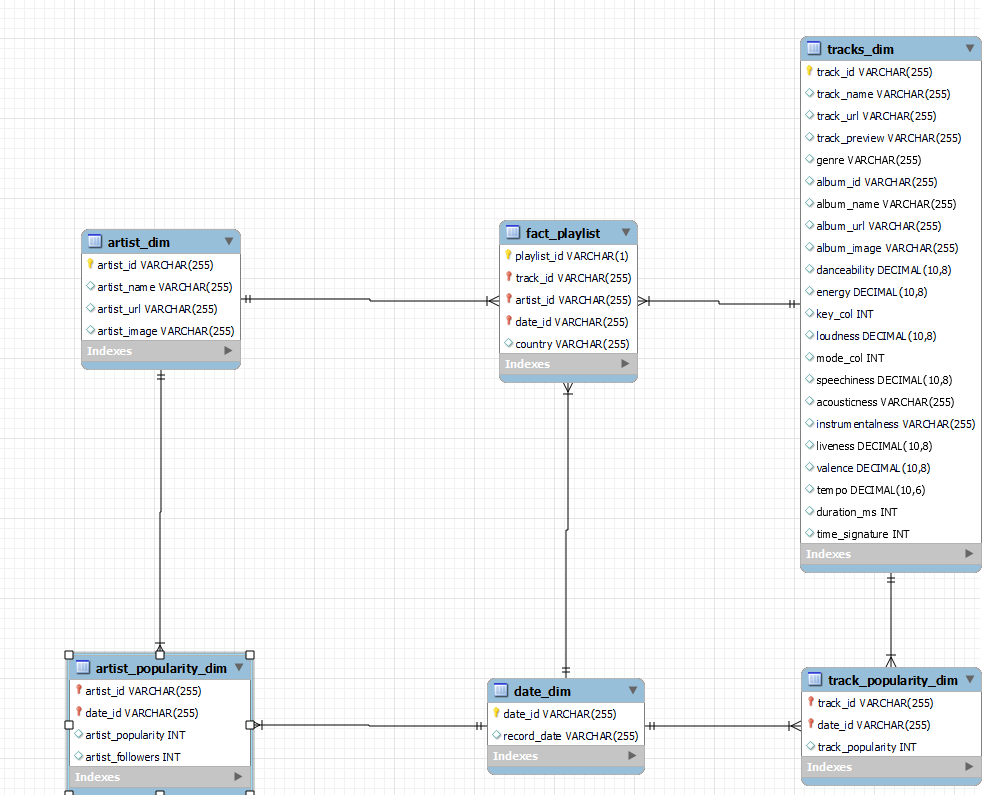

In [11]:
table_lists = ['artist_dim', 'date_dim', 'tracks_dim', 'fact_playlist', 'track_popularity_dim', 'artist_popularity_dim']
for table in table_lists:
    print("DROP TABLE IF EXISTS {};".format(table))


DROP TABLE IF EXISTS artist_dim;
DROP TABLE IF EXISTS date_dim;
DROP TABLE IF EXISTS tracks_dim;
DROP TABLE IF EXISTS fact_playlist;
DROP TABLE IF EXISTS track_popularity_dim;
DROP TABLE IF EXISTS artist_popularity_dim;


In [12]:
#create tables
for query in table_list:
    cursor.execute(query)
    print('Table created.') 
conn.commit()   

#create staging tables
for query in staging_table_list:
    cursor.execute(query)
    print('Table created.') 
conn.commit()  


Table created.
Table created.
Table created.
Table created.
Table created.
Table created.
Table created.
Table created.
Table created.
Table created.
Table created.
Table created.


In [ ]:
s3 = boto3.client('s3', aws_access_key_id = ACCESS_KEY_ID,  aws_secret_access_key = SECRET_ACCESS_KEY)

response = s3.list_objects(Bucket=bucket)

for obj in response['Contents']:
    print(obj['Key'])

raw_data/
raw_data/playlist_by_country/spotify_raw_by_country2023-05-18.json
raw_data/playlist_by_country/spotify_raw_by_country2023-05-19.json
raw_data/playlist_by_country/spotify_raw_by_country2023-05-20.json
transformed_data/
transformed_data/artist/artist_2023-05-18.csv
transformed_data/artist/artist_2023-05-19.csv
transformed_data/artist/artist_2023-05-20.csv
transformed_data/artist_popularity/artist_popularity_2023-05-18.csv
transformed_data/artist_popularity/artist_popularity_2023-05-19.csv
transformed_data/artist_popularity/artist_popularity_2023-05-20.csv
transformed_data/date/date_2023-05-18.csv
transformed_data/date/date_2023-05-19.csv
transformed_data/date/date_2023-05-20.csv
transformed_data/playlist/playlist_2023-05-18.csv
transformed_data/playlist/playlist_2023-05-19.csv
transformed_data/playlist/playlist_2023-05-20.csv
transformed_data/track_popularity/track_popularity_2023-05-18.csv
transformed_data/track_popularity/track_popularity_2023-05-19.csv
transformed_data/trac

In [2]:
# create sql query to load data from s3 to redshift
tables = {'artist_dim':'transformed_data/artist/', 
          'date_dim':'transformed_data/date/', 
          'tracks_dim':'transformed_data/tracks/', 
          'fact_playlist':'transformed_data/playlist/', 
          'track_popularity_dim':'transformed_data/track_popularity/', 
          'artist_popularity_dim':'transformed_data/artist_popularity/'}

bucket = 'spotify-project-jr'

for key, item in tables.items():
    print("COPY {}".format(key))
    print("FROM 's3://{}/{}'".format(bucket, item))
    print("IAM_ROLE 'Your Redshift Role ARN'")
    print("DELIMITER ','")
    print("IGNOREHEADER 1")
    print("REGION 'ap-southeast-2';\n")

COPY artist_dim
FROM 's3://spotify-project-jr/transformed_data/artist/'
IAM_ROLE 'Your Redshift Role ARN'
DELIMITER ','
IGNOREHEADER 1
REGION 'ap-southeast-2';

COPY date_dim
FROM 's3://spotify-project-jr/transformed_data/date/'
IAM_ROLE 'Your Redshift Role ARN'
DELIMITER ','
IGNOREHEADER 1
REGION 'ap-southeast-2';

COPY tracks_dim
FROM 's3://spotify-project-jr/transformed_data/tracks/'
IAM_ROLE 'Your Redshift Role ARN'
DELIMITER ','
IGNOREHEADER 1
REGION 'ap-southeast-2';

COPY fact_playlist
FROM 's3://spotify-project-jr/transformed_data/playlist/'
IAM_ROLE 'Your Redshift Role ARN'
DELIMITER ','
IGNOREHEADER 1
REGION 'ap-southeast-2';

COPY track_popularity_dim
FROM 's3://spotify-project-jr/transformed_data/track_popularity/'
IAM_ROLE 'Your Redshift Role ARN'
DELIMITER ','
IGNOREHEADER 1
REGION 'ap-southeast-2';

COPY artist_popularity_dim
FROM 's3://spotify-project-jr/transformed_data/artist_popularity/'
IAM_ROLE 'Your Redshift Role ARN'
DELIMITER ','
IGNOREHEADER 1
REGION 'ap-southe

In [24]:
import boto3
import psycopg2
from io import StringIO
import datetime

#get current date
now = datetime.datetime.now()
year = '{:02d}'.format(now.year)
month = '{:02d}'.format(now.month)
day = '{:02d}'.format(now.day)
day_month_year = '{}-{}-{}'.format(year, month, day)
day_month_year = '2023-05-20'

s3 = boto3.client('s3', aws_access_key_id = ACCESS_KEY_ID,  aws_secret_access_key = SECRET_ACCESS_KEY)
redshift = psycopg2.connect(
    dbname='dev',
    host='your host',
    port='5439',
    user='your user',
    password='your password'
)
cur = redshift.cursor()

bucket = 'spotify-project-jr'
tables = {'artist_dim':'transformed_data/artist/artist_', 
          'date_dim':'transformed_data/date/date_', 
          'tracks_dim':'transformed_data/tracks/tracks_', 
          'fact_playlist':'transformed_data/playlist/playlist_', 
          'track_popularity_dim':'transformed_data/track_popularity/track_popularity_', 
          'artist_popularity_dim':'transformed_data/artist_popularity/artist_popularity_'}

for key, item in tables.items():
    the_key = item + day_month_year + '.csv'
    s3_path = "s3://{bucket}/" + the_key # replace with your actual S3 path
    iam_role = "your role" 

    copy_query = f"""
        COPY staging_{key}
        FROM '{s3_path}'
        IAM_ROLE '{iam_role}'
        CSV 
        IGNOREHEADER 1;
    """

    cur.execute(copy_query)







    # # Clear staging table
    # cur.execute(f"DELETE FROM staging_{key}")
    # the_key = item + day_month_year + '.csv'
    # # Load data into staging table
    # obj = s3.get_object(Bucket=bucket, Key=the_key)
    # data = obj['Body'].read().decode('utf-8')
    # csv_data = StringIO(data)
    
    # cur.copy_expert(f"COPY staging_{key} FROM STDIN WITH CSV HEADER", csv_data)
    # redshift.commit()

    # # Insert unique records from staging table to main table
    # if key == 'fact_playlist':
    #     # As 'fact_playlist' table has composite primary key, need to handle separately
    #     cur.execute(f"""
    #         INSERT INTO {key} 
    #         SELECT s.* FROM staging_{key} s
    #         LEFT JOIN {key} t
    #         ON s.playlist_id = t.playlist_id AND s.track_id = t.track_id AND s.artist_id = t.artist_id AND s.date_id = t.date_id
    #         WHERE t.playlist_id IS NULL
    #     """)
    # else:
    #     cur.execute(f"""
    #         INSERT INTO {key} 
    #         SELECT s.* FROM staging_{key} s
    #         LEFT JOIN {key} t
    #         ON s.{key}_id = t.{key}_id
    #         WHERE t.{key}_id IS NULL
    #     """)
    redshift.commit()
    
cur.close()

InternalError_: exception name : UnauthorizedException, error type : 135, message: The requested role arn:aws:iam::933736887290:role/service-role/AWSGlueServiceRole-jr-spotify-role is not associated to cluster, should retry : 0
DETAIL:  
  -----------------------------------------------
  error:  exception name : UnauthorizedException, error type : 135, message: The requested role arn:aws:iam::933736887290:role/service-role/AWSGlueServiceRole-jr-spotify-role is not associated to cluster, should retry : 0
  code:      30000
  context:   
  query:     209526
  location:  xen_aws_credentials_mgr.cpp:440
  process:   padbmaster [pid=1073766719]
  -----------------------------------------------



In [7]:
tables = {'artist_dim':'transformed_data/artist/artist_', 
          'date_dim':'transformed_data/date/date_', 
          'tracks_dim':'transformed_data/tracks/tracks_', 
          'fact_playlist':'transformed_data/playlist/playlist_', 
          'track_popularity_dim':'transformed_data/track_popularity/track_popularity_', 
          'artist_popularity_dim':'transformed_data/artist_popularity/artist_popularity_'}

In [11]:
item + day_month_year + '.csv'

'transformed_data/artist_popularity/artist_popularity_2023-05-20.csv'